In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import tqdm
import numpy
import torchvision
import torchvision.transforms.v2

train = torchvision.datasets.CIFAR10('cifar-10', train = True, download = False)
test = torchvision.datasets.CIFAR10('cifar-10', train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) for item in tqdm.tqdm(train) ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) for item in tqdm.tqdm(test) ])
test_labels = numpy.array([ item[1] for item in test ])

train_images.shape, test_images.shape

100%|██████████| 10000/10000 [00:00<00:00, 38803.70it/s]


((50000, 32, 32, 3), (10000, 32, 32, 3))

4
[{'area': 0.0, 'perimeter': 8.0, 'bounding_box': ((27, 31), (32, 32))}, {'area': 0.0, 'perimeter': 2.0, 'bounding_box': ((17, 27), (18, 29))}, {'area': 0.0, 'perimeter': 0.0, 'bounding_box': ((1, 12), (2, 13))}, {'area': 442.0, 'perimeter': 256.99494767189026, 'bounding_box': ((0, 0), (32, 32))}]


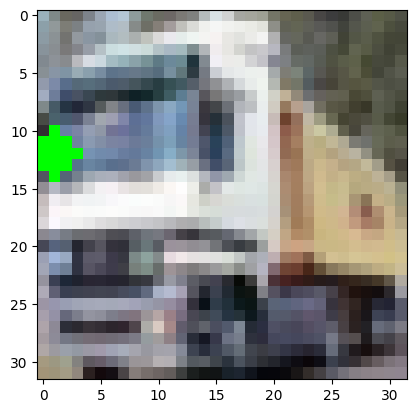

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_geometrical_features(image):
    # Load the image
    image = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _, binary_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    plt.imshow(cv2.drawContours(image, contours, 2, (0,255,0), 3))
    plt.imshow(image)

    geometrical_features = []
    for contour in contours:
        # Calculate area
        area = cv2.contourArea(contour)

        # Calculate perimeter
        perimeter = cv2.arcLength(contour, True)

        # Get bounding box
        x, y, w, h = cv2.boundingRect(contour)
        bounding_box = (x, y), (x + w, y + h)

        features = {
            'area': area,
            'perimeter': perimeter,
            'bounding_box': bounding_box
        }
        geometrical_features.append(features)

    return geometrical_features

features = calculate_geometrical_features(train_images[1])
print(len(features))
print(features)

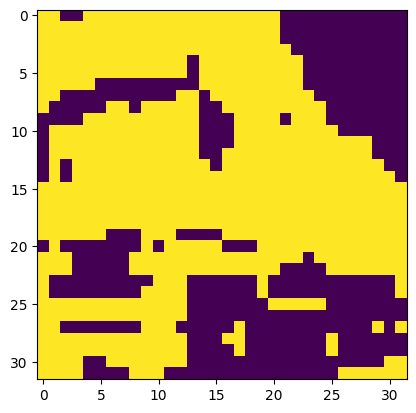

In [68]:
import skimage.measure

gray = train_images[1].mean(axis = 2)
bin = (gray > 0.4 * 255)
plt.imshow(bin)

In [ ]:
thresholds = list(range(256))
euler_numbers = []
area = []
perimeter = []
perimeter_crofton = []
for threshold in thresholds:
    bin = (gray > threshold)
    euler_numbers.append(skimage.measure.euler_number(bin))
    area.append(bin.sum())
    perimeter.append(skimage.measure.perimeter(bin))
    perimeter_crofton.append(skimage.measure.perimeter_crofton(bin))
euler_numbers = numpy.array(euler_numbers)
area = numpy.array(area)
perimeter = numpy.array(perimeter)
perimeter_crofton = numpy.array(perimeter_crofton)

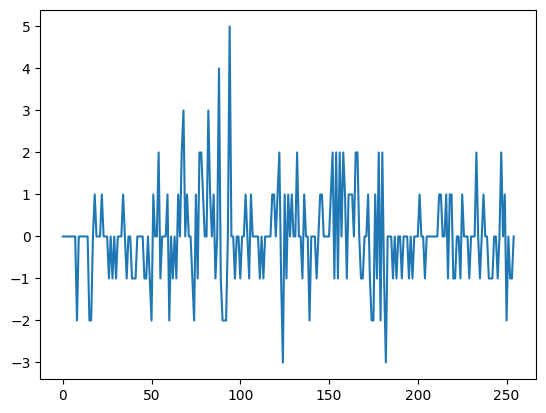

In [104]:
plt.plot(thresholds[:-1], numpy.diff(euler_numbers))

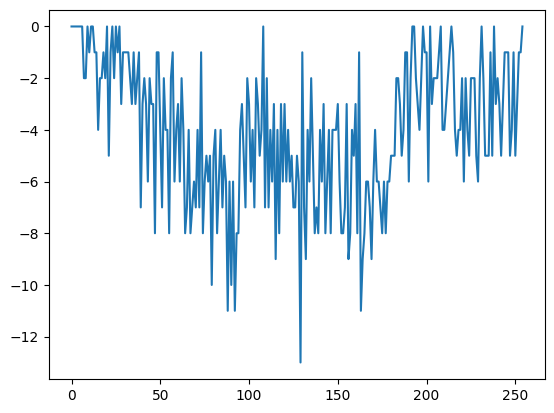

In [106]:
plt.plot(thresholds[:-1], numpy.diff(area))

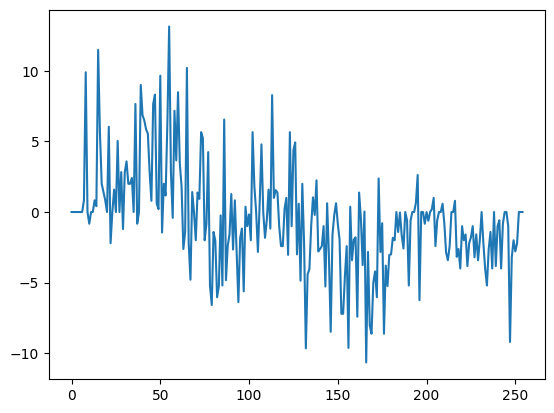

In [107]:
plt.plot(thresholds[:-1], numpy.diff(perimeter))

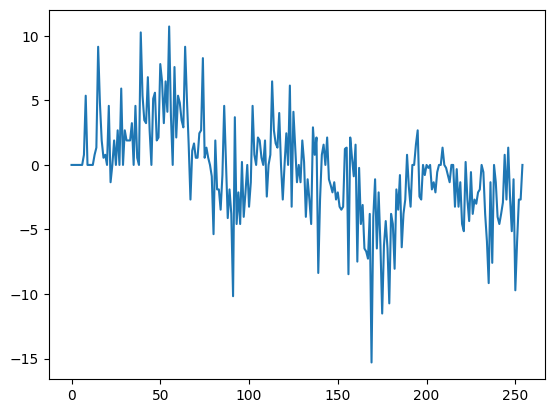

In [108]:
plt.plot(thresholds[:-1], numpy.diff(perimeter_crofton))

In [67]:
skimage.measure.euler_number(bin)

-2

In [ ]:
bin.sum() # area

648

In [72]:
skimage.measure.perimeter(bin)

258.095454429505

In [73]:
skimage.measure.perimeter_crofton(bin)

278.9268192272382

In [70]:
skimage.measure.label(bin)

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 6, 6],
       [1, 1, 1, ..., 6, 6, 6]])

{'label': array([1, 2, 3, 4, 5, 6]),
 'bbox-0': array([ 0, 27, 27, 27, 28, 30]),
 'bbox-1': array([ 0, 16, 29, 31, 25, 26]),
 'bbox-2': array([32, 30, 28, 28, 30, 32]),
 'bbox-3': array([32, 18, 30, 32, 26, 32])}

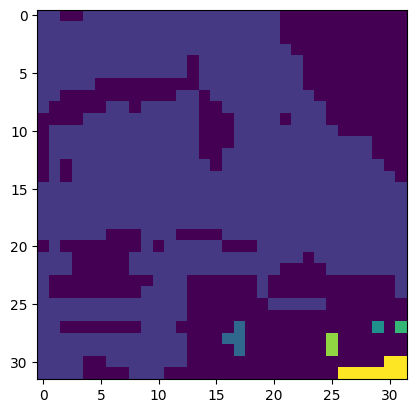

In [77]:
labeled_image = skimage.measure.label(bin)
plt.imshow(labeled_image)

skimage.measure.regionprops_table(labeled_image)

In [ ]:
region = skimage.measure.regionprops(labeled_image)[1]

region.area, region.area_bbox, region.area_convex

(4.0, 6.0, 4.0)

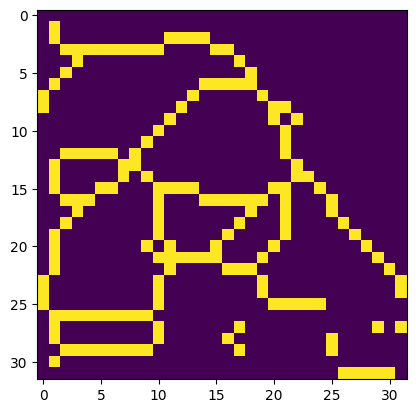

In [89]:
plt.imshow(skimage.morphology.thin(bin))